# Visualizing Networks

In [8]:
%matplotlib notebook

import networkx as nx
import matplotlib.pyplot as plt

# read in the graph 
G = nx.read_gpickle('major_us_cities')

<IPython.core.display.Javascript object>


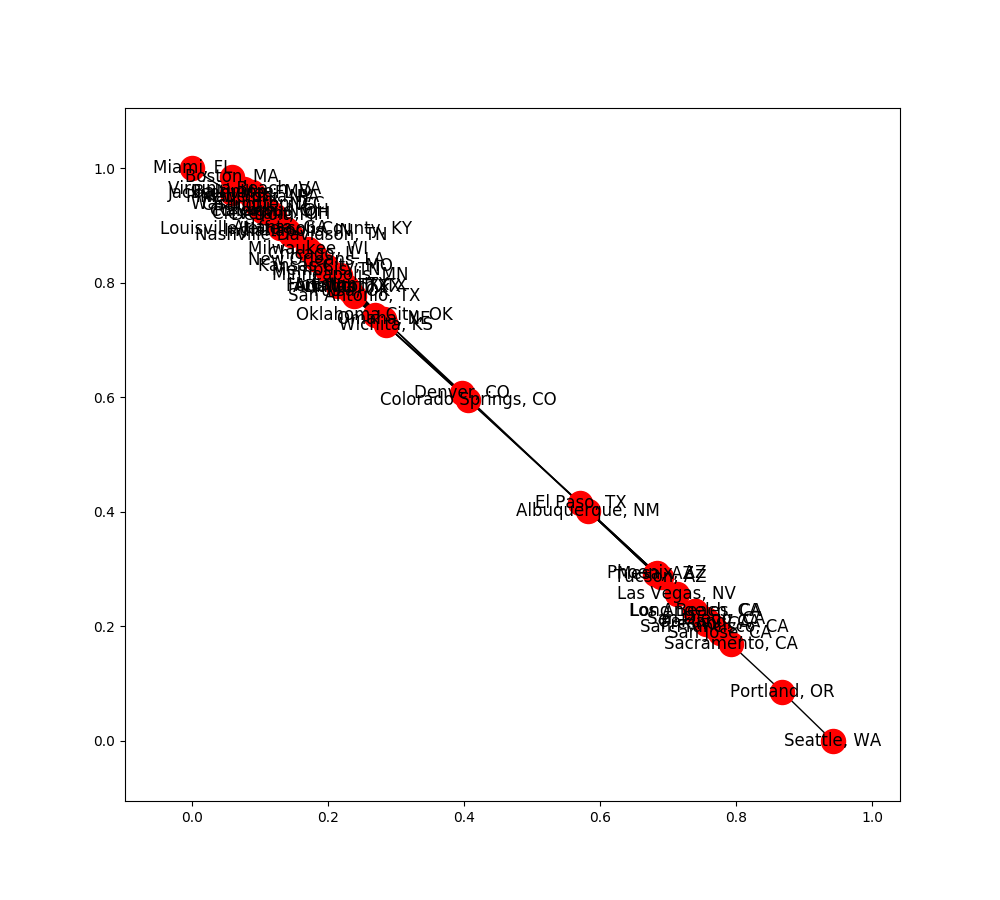

In [9]:
# draw the graph using the default spring layout (tries to draw the network so that there's little crossing of edges)
plt.figure(figsize=(10,9))
nx.draw_networkx(G)

In [10]:
# See what layouts are available in networkX
[x for x in nx.__dir__() if x.endswith('_layout')]

['circular_layout',
 'random_layout',
 'shell_layout',
 'spring_layout',
 'spectral_layout',
 'fruchterman_reingold_layout']

<IPython.core.display.Javascript object>


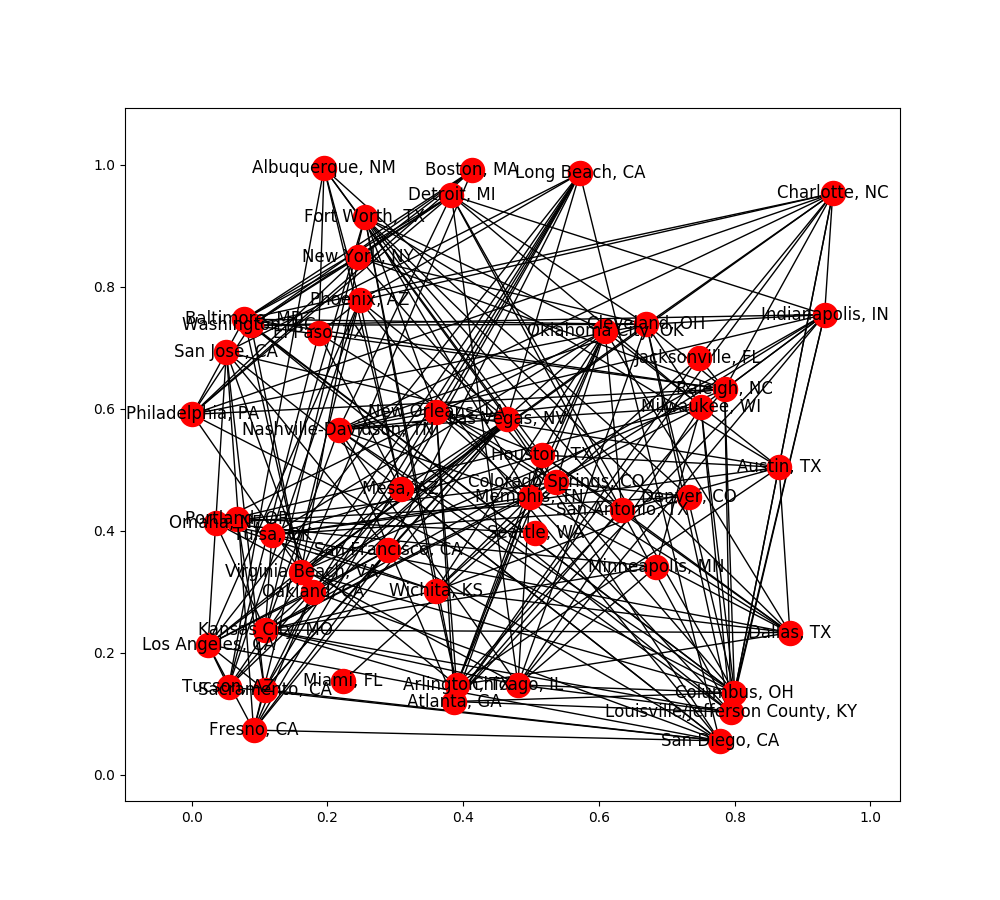

In [11]:
# Draw the graph using the random layout
plt.figure(figsize=(10,9))
pos = nx.random_layout(G)
nx.draw_networkx(G, pos)

<IPython.core.display.Javascript object>


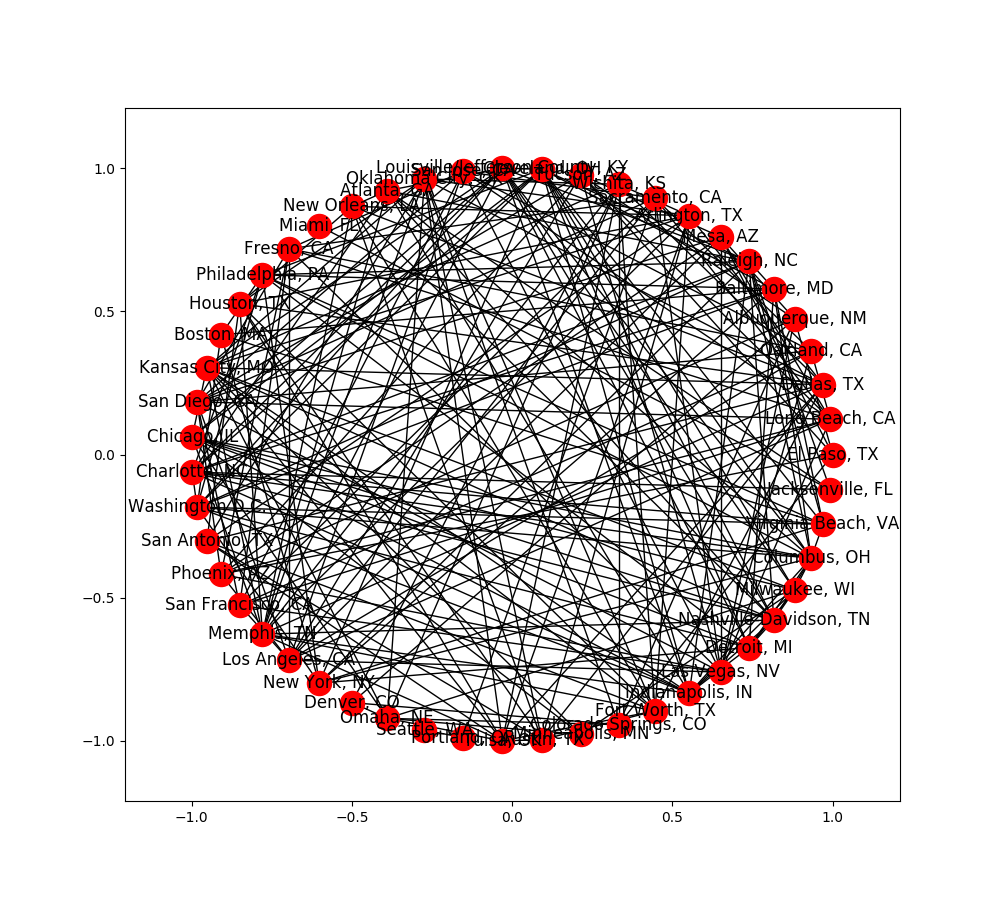

In [12]:
# Draw the graph using the circular layout
plt.figure(figsize=(10,9))
pos = nx.circular_layout(G)
nx.draw_networkx(G, pos)

<IPython.core.display.Javascript object>


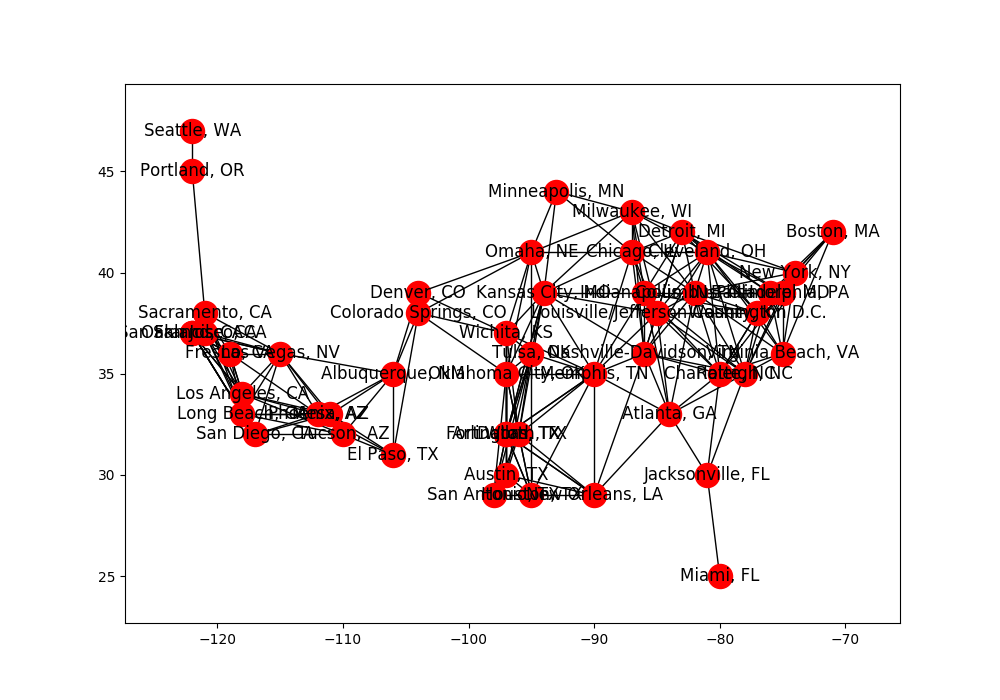

In [13]:
# Draw the graph using custom node positions. You have to pass a dict of positions for the nodes. But in our case,
# nodes have an attribute 'location' which already is their position in the map
plt.figure(figsize=(10,7))

pos = nx.get_node_attributes(G, 'location')
nx.draw_networkx(G, pos)

<IPython.core.display.Javascript object>


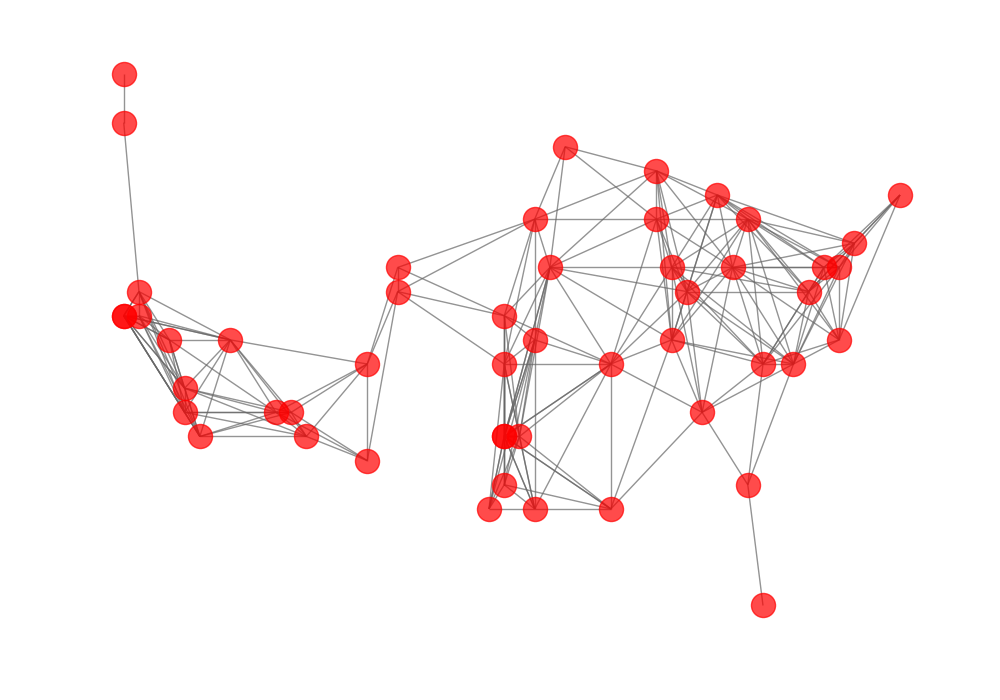

In [14]:
# Draw the graph adding alpha, removing labels, and softening edge color
plt.figure(figsize=(10,7))

nx.draw_networkx(G, pos, alpha=0.7, with_labels=False, edge_color='.4')

plt.axis('off')
plt.tight_layout(); #takes out some padding (margins)

<IPython.core.display.Javascript object>


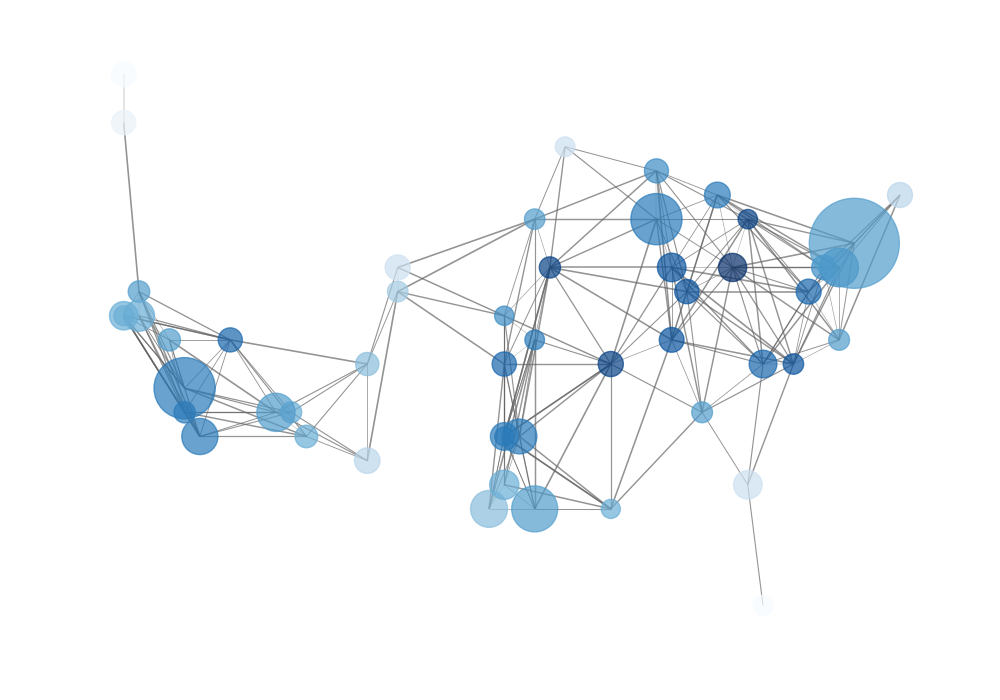

In [17]:
# Draw graph with varying node color, node size, and edge width
plt.figure(figsize=(10,7))

# node color based on its degree
node_color = [G.degree(v) for v in G]
# node size = 0.0005 * its population
node_size = [0.0005*nx.get_node_attributes(G, 'population')[v] for v in G]
# edge width = 0.0015 * its weight
edge_width = [0.0015*G[u][v]['weight'] for u,v in G.edges()]

nx.draw_networkx(G, pos, node_size=node_size, 
                 node_color=node_color, alpha=0.7, with_labels=False, 
                 width=edge_width, edge_color='.4', cmap=plt.cm.Blues)

plt.axis('off')
plt.tight_layout();

<IPython.core.display.Javascript object>


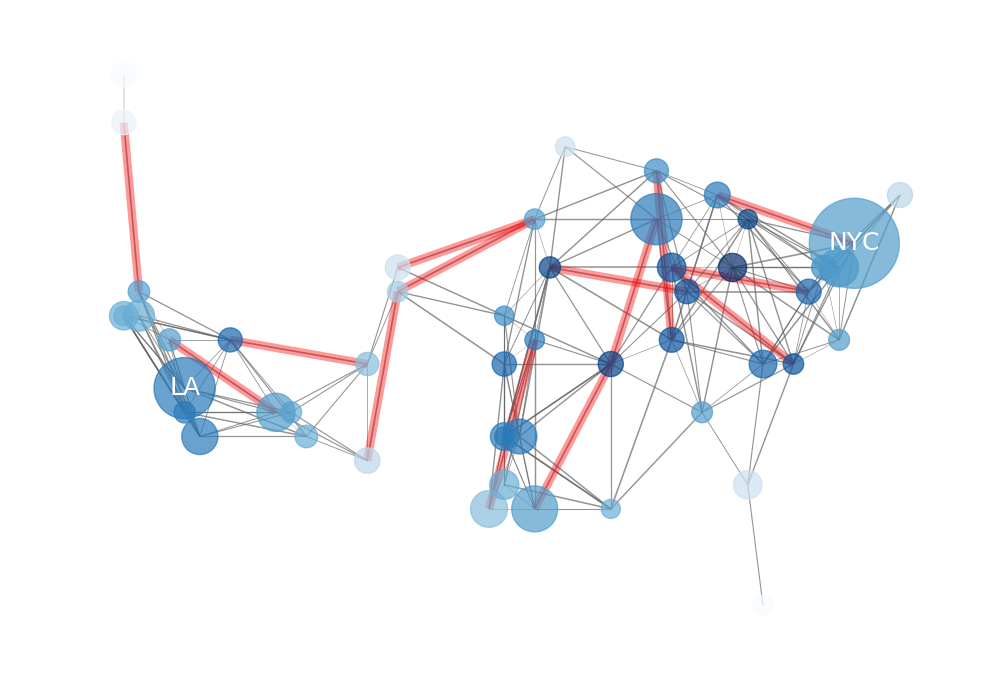

In [18]:
# Draw specific edges and add labels to specific nodes
plt.figure(figsize=(10,7))

node_color = [G.degree(v) for v in G]
node_size = [0.0005*nx.get_node_attributes(G, 'population')[v] for v in G]
edge_width = [0.0015*G[u][v]['weight'] for u,v in G.edges()]

nx.draw_networkx(G, pos, node_size=node_size, 
                 node_color=node_color, alpha=0.7, with_labels=False, 
                 width=edge_width, edge_color='.4', cmap=plt.cm.Blues)

# identify the most expensive (weight>770) edges in the network
greater_than_770 = [x for x in G.edges(data=True) if x[2]['weight']>770]
# plot them with red, semi-transparent and thick lines
nx.draw_networkx_edges(G, pos, edgelist=greater_than_770, edge_color='r', alpha=0.4, width=6)

# add labels only to Los Angeles as "LA" and New York City as "NYC" in white
nx.draw_networkx_labels(G, pos, labels={'Los Angeles, CA': 'LA', 'New York, NY': 'NYC'}, font_size=18, font_color='w')

plt.axis('off')
plt.tight_layout();